#### Graph inspector
Demonstration of the functionality in GraphInspector. Rough overview of implemented features:
- Graph visualization: Mesh, Grid, Encoder, Decoder
- Checking for orphans: Quickcheck and plotting
- Edge weights statistics

In [1]:
from GraphInspector import GraphInspector

# Initialize a Graph inspector either with the path to the graph file or an allready loaded graph.
#path_to_graph = '/lustre/storeB/project/nwp/aifs/graphs/era-o96_meps-10km_grid_5p3_mesh_1.0xmeps-weights_v5_FIXED_EDGE_LENGTH.pt'
import os
print(os.listdir('../../'))
path_to_graph = '../../graph.pt'
path_to_output = ''

# Specify mesh and grid key - these are the keys in the graph dict.
graph = GraphInspector(path_to_graph, grid_key = 'data', hidden_key = 'hidden', coords_key='x')

['anemoi-utils', 'clone_graph_inspection.sh', 'pyvenv.cfg', 'aifs-support', 'mlflow_sync.sh', 'template_configs', 'env_setup_infer.sh', 'outputs', 'mlflow_login.sh', 'lumi_graph.sh', 'anemoi-core', 'share', 'env_setup_core.sh', 'make_env_core.sh', 'run_pytorch_graph.sh', 'run_pytorch.sh', 'include', 'make_env.sh', 'lib64', 'graph.pt', 'run_pytorch_infer.sh', 'make_env_infer.sh', 'lib', '.venv', 'lumi_infer.sh', 'lumi_jobscript.sh', 'env_setup.sh', 'graph_thinning50.pt', 'bin', 'anemoi-datasets']


/pfs/lustrep3/scratch/project_465001902/experiments/graph_test/run-anemoi-ocean/lumi/aifs-support/graph_inspection/GraphInspector.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f

#### Graph visualization
The graph visualization tools are all set up to return (fig, ax), as this makes it slighly easier to adjust xlim and ylim without having to re-generate the plot. You can also specify xlim, ylim and save_path.

(<Figure size 1200x600 with 1 Axes>, <GeoAxes: >)

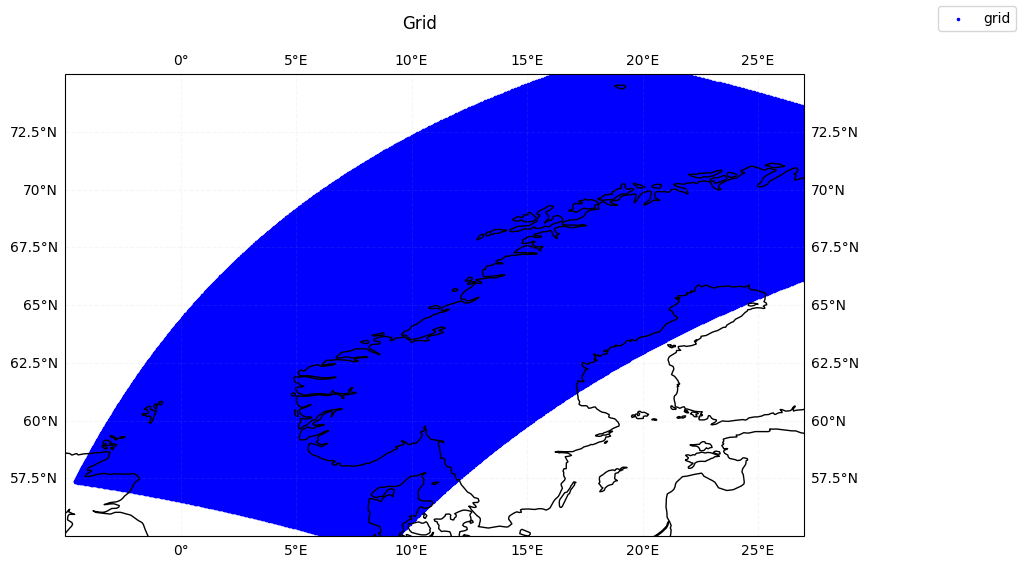

In [4]:
# Grid
xlim = (-5, 27) #Degrees east [-180, 180]
ylim = (55, 75)
graph.plot_grid(xlim=xlim, ylim=ylim)

(<Figure size 1200x600 with 1 Axes>, <GeoAxes: >)

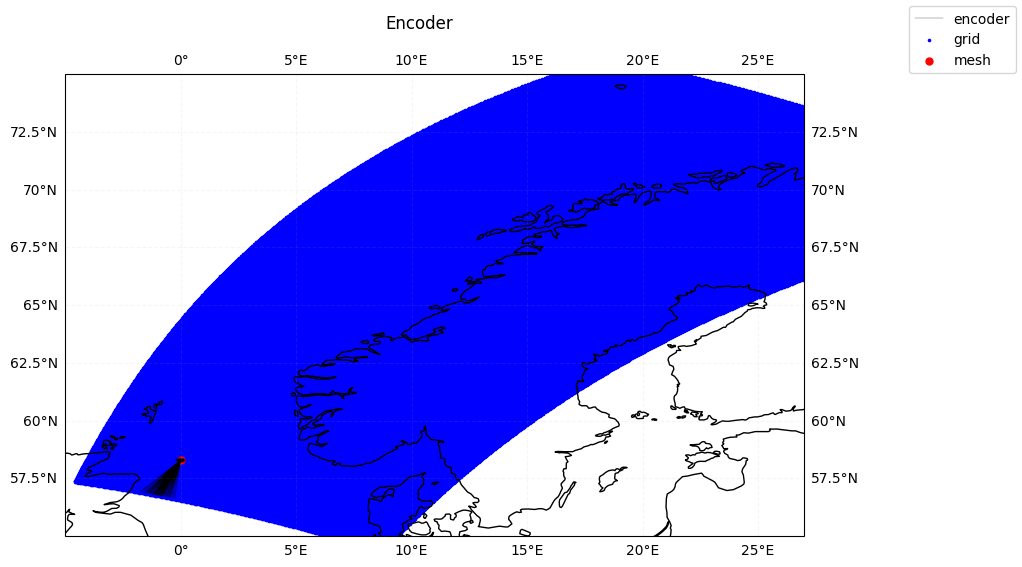

In [5]:
# Encoder
graph.plot_encoder(xlim=xlim, ylim=ylim)

(<Figure size 1200x600 with 1 Axes>, <GeoAxes: >)

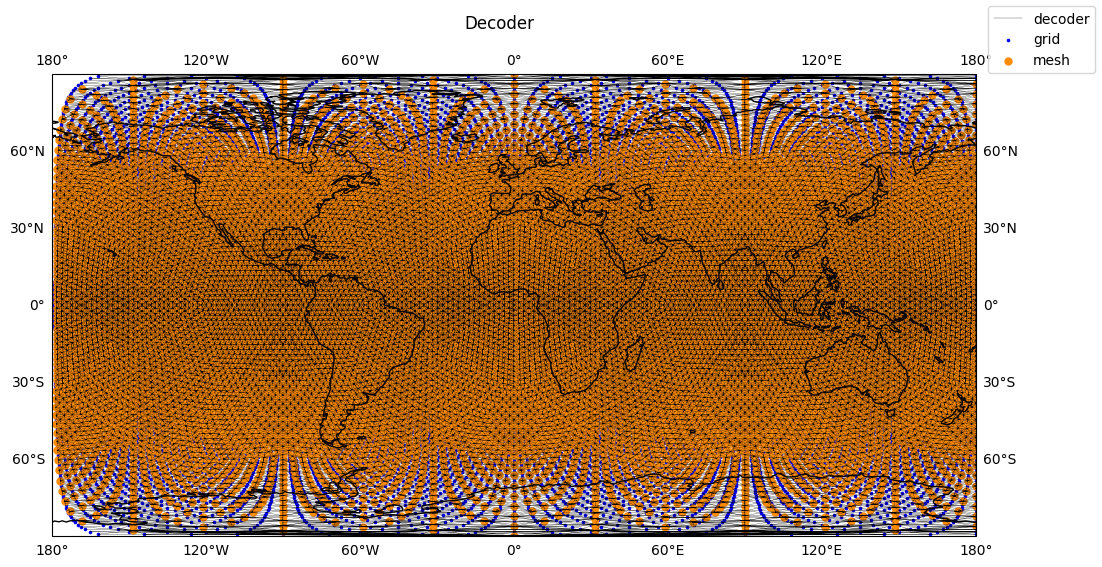

In [11]:
# Decoder 
graph.plot_decoder()

In [ ]:
# Mesh
graph.plot_mesh()

In [ ]:
# Zooming
xlim = (-7, 5) #Degrees east [-180, 180]
ylim = (50, 55) #Degrees north [-90,90]
graph.plot_encoder(xlim=xlim, ylim=ylim)

(<Figure size 1200x600 with 2 Axes>, <GeoAxes: >)

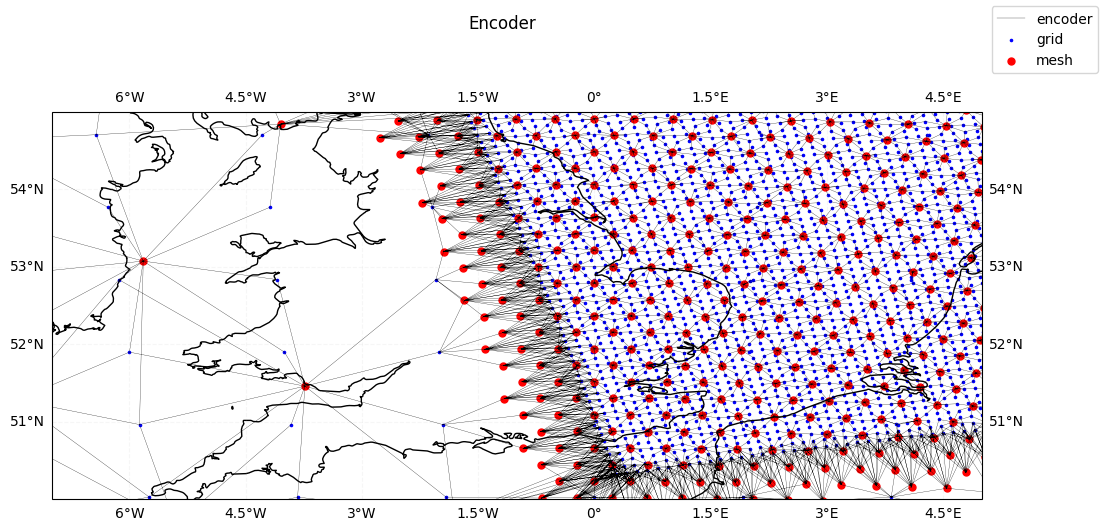

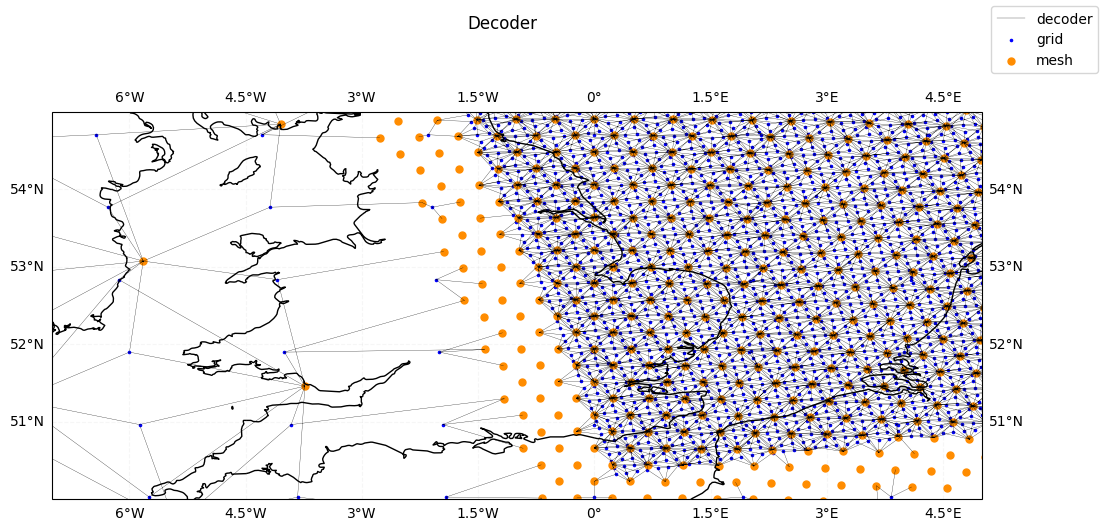

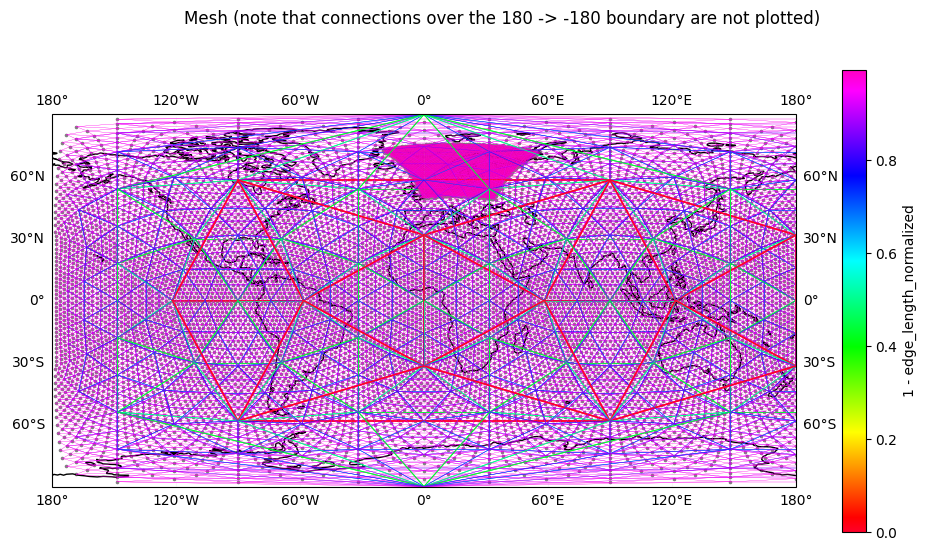

In [2]:
# Saving
xlim = (-7, 5)
ylim = (50, 55)
graph.plot_encoder(xlim=xlim, ylim=ylim, save_path=path_to_output + 'encoder_zoom.png')
graph.plot_decoder(xlim=xlim, ylim=ylim, save_path=path_to_output + 'decoder_zoom.png')
graph.plot_mesh(save_path=path_to_output + 'multimesh_global.png')


In [8]:
# Change xlim and ylim without having to remake the whole plot:
'''
fig, ax = graph.plot_mesh()
'''

In [9]:
'''
xlim = (20,40)
ylim = (60,80)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
fig.savefig('test.png') #Have to open this in the folder to look at result, atleast fig.show() doesnt work
                        # for me in notebook
'''

"\nxlim = (20,40)\nylim = (60,80)\nax.set_xlim(xlim)\nax.set_ylim(ylim)\nfig.savefig('test.png') #Have to open this in the folder to look at result, atleast fig.show() doesnt work\n                        # for me in notebook\n"

#### Checking for orphans
When making a new graph a nice quickcheck is to see if we have orphans (dead nodes with zero connections)

In [ ]:
# Quickcheck:
graph.has_orphans()

In [ ]:
# Plot these:
graph.plot_orphans()

#### Statistics for edge weights
Shows histogram for edge weights (1 - edge_length_normalized) in graph, mesh, encoder decoder. These can be usefull to check that we have distinct signals from the local and global parts of the graph.

In [ ]:
graph.plot_edge_weights_histogram()

In [7]:
aw = graph.area_weights
lats = graph.grid_lats
lons = graph.grid_lons

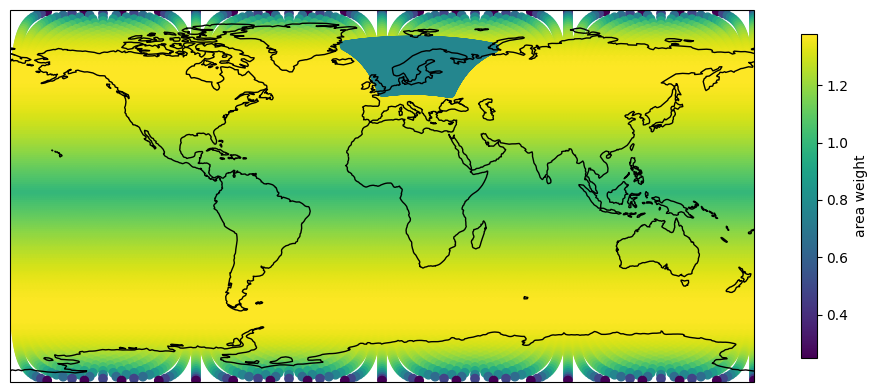

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig, ax = plt.subplots(figsize=(12,6), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()
c = ax.scatter(lons, lats, c=aw, label='area weight')
fig.colorbar(c, ax=ax, label='area weight', shrink=0.7)

(<Figure size 1200x600 with 2 Axes>, <GeoAxes: >)

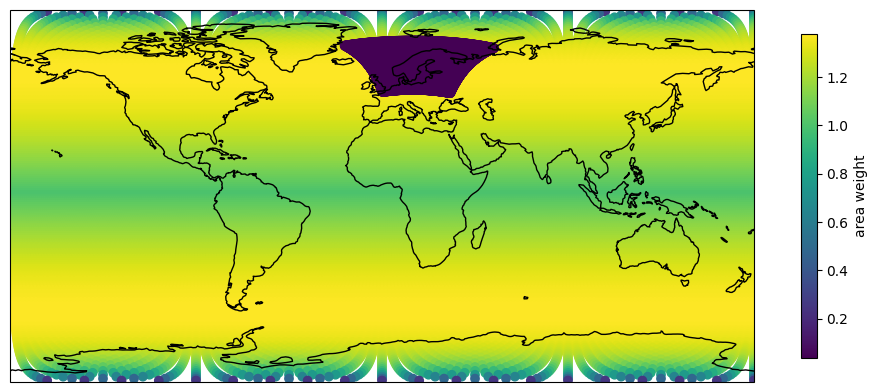

In [9]:
graph.plot_area_weights()